<a href="https://colab.research.google.com/github/Sachini007/Data-Storm-3.0/blob/main/03-27/Copy_of_DataStormEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle &> /dev/null
!pip install sweetviz &> /dev/null

In [6]:
import sweetviz as sv
import numpy as np
import pandas as pd

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ds2299","key":"43e887a47212eed4dbbfbc35ae78740f"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c 'data-storm-30'

  0% 0.00/233k [00:00<?, ?B/s]
100% 233k/233k [00:00<00:00, 37.2MB/s]


In [7]:
! mkdir data_storm_30

In [8]:
! unzip data-storm-30.zip -d data_storm_30

Archive:  data-storm-30.zip
  inflating: data_storm_30/DataStorm3.0_KaggleProblemStatement.pdf  
  inflating: data_storm_30/test_data.csv  
  inflating: data_storm_30/train_data.csv  
  inflating: data_storm_30/validation_data.csv  


In [7]:
train_df_orig = pd.read_csv('/content/data_storm_30/train_data.csv', parse_dates = ['DateID'])
val_df_orig = pd.read_csv('/content/data_storm_30/validation_data.csv')
test_df_orig = pd.read_csv('/content/data_storm_30/test_data.csv')

In [8]:
train_df = train_df_orig
val_df = val_df_orig
test_df = test_df_orig

In [67]:
print(train_df.shape, val_df.shape, test_df.shape, "\n")

(19921, 4) (370, 4) (377, 4) 



## **Training dataset** 

Historical item sales dataset consists of **194 items** from **4 different categories** with ***daily sales*** in **quantity units** collected through
transactions for **5 months**. (train-data.csv)

* CategoryCode: 4 different categories
* ItemCode: item identifier. 194 items
* DateID: Date of sale. The time period starts from 1st October 2021 to 13th February 2022 (5 months)
* DailySales: Sales value in quantity units for the respective item on the given date.

## **Validation dataset**
For specific items with **weekly
sales in quantity units** for the **4 weeks** from 14
th February to 13th March 2022
(validation_data.csv)

* Week: The time period starts from 14th February to 13th March (Monday to
Sunday). 

The weeks are as follows:

* w1: 14th February 2022 – 20th February 2022
* w2: 21st February 2022 – 27th February 2022
* w3: 28th February 2022 – 6
th March 2022
* w4: 7th March 2022 – 13th March 2022

* WeeklySales: Sales value in quantity units for the respective item for the
given week.

## **Testing dataset**
Final
weekly sales for the next 4 weeks should be submitted in a CSV format with
columns.

* Week: The time period starts from 14th February to 13th March. The weeks are as
follows:
* w1: 14th February 2022 – 20th February 2022
* w2: 21st February 2022 – 27th February 2022
* w3: 28th February 2022 – 6
th March 2022
* w4: 7th March 2022 – 13th March 2022

PredictedSales: You are required to predict the sales value in this column, in quantity units.



In [12]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,2021-11-06,7
1,category_4,836584,2021-11-18,16
2,category_1,370195,2022-01-24,6
3,category_2,172582,2021-10-30,5
4,category_2,1006009,2021-10-30,5


In [13]:
val_df.head()

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60


In [14]:
test_df.head()

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN


In [15]:
# Analyzing data
report = sv.analyze(train_df)

# Generating report
report.show_html('/content/eda_report_train_set.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/eda_report_train_set.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
report_train_val = sv.compare([train_df, "Train"], [val_df, "Validation"])
report_train_val.show_html('/content/eda_report_train_val.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/eda_report_train_val.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
uniqueValues = train_df.nunique()
print('Count of unique value sin each column in Train set :')
print(uniqueValues)

Count of unique value sin each column in Train set :
CategoryCode      4
ItemCode        194
DateID          136
DailySales      162
dtype: int64


In [18]:
uniqueValues = val_df.nunique()
print('Count of unique value sin each column in Validation set :')
print(uniqueValues)

Count of unique value sin each column in Validation set :
CategoryCode      4
ItemCode         95
Week              4
WeeklySales     105
dtype: int64


In [19]:
train_df.dtypes

CategoryCode            object
ItemCode                 int64
DateID          datetime64[ns]
DailySales               int64
dtype: object

In [20]:
val_df.dtypes

CategoryCode    object
ItemCode         int64
Week            object
WeeklySales      int64
dtype: object

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

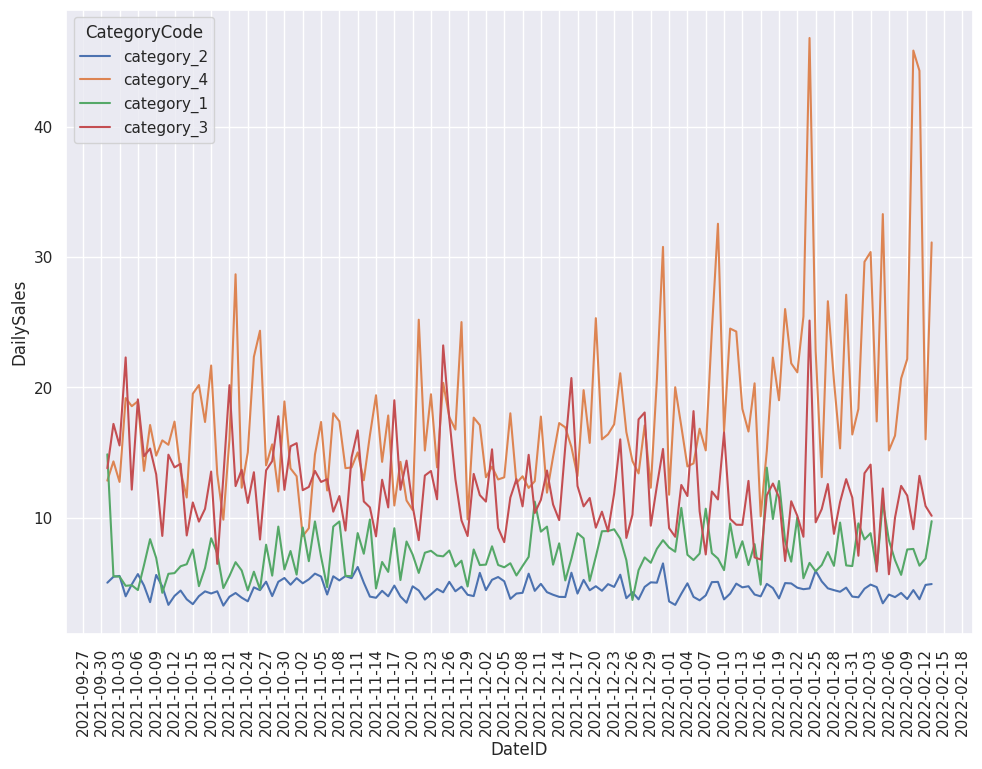

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(x='DateID', y='DailySales', hue='CategoryCode', data=train_df, ci=None) 

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=3))

plt.show()

In [9]:
sales_category_daily_total = train_df.groupby('CategoryCode')['DailySales'].sum()

In [10]:
sales_category_daily_total

CategoryCode
category_1    49528
category_2    41772
category_3    28910
category_4    26247
Name: DailySales, dtype: int64

In [11]:
cop = train_df.copy()
cop.set_index("DateID", inplace = True)

In [12]:
df_new = cop.groupby([pd.Grouper(freq='w-mon'), 'CategoryCode','ItemCode']).sum()
df_train = df_new.reset_index()

df_train = df_train.rename(columns={'DailySales': 'WeeklySales'})

df_train.head()

,DateID,CategoryCode,ItemCode,WeeklySales
0,2021-10-04,category_1,3418,31
1,2021-10-04,category_1,3427,14
2,2021-10-04,category_1,17287,3
3,2021-10-04,category_1,17296,141
4,2021-10-04,category_1,24136,24


In [13]:
new_val = val_df.copy()
new_test = test_df.copy()
new_val.head()

,CategoryCode,ItemCode,Week,WeeklySales
0,category_2,1044502,w1,11
1,category_2,1105009,w1,11
2,category_2,913561,w4,5
3,category_1,1048975,w4,30
4,category_1,17287,w2,60


In [14]:
d = {'w1': '2022-02-14', 'w2': '2022-02-21', 'w3': '2022-02-28', 'w4': '2022-03-07'}

new_val['DateID'] = new_val['Week'].map(d)
new_test['DateID'] = new_test['Week'].map(d)

new_val.drop('Week', axis=1, inplace=True)
new_test.drop('Week', axis=1, inplace=True)

new_val.head()

,CategoryCode,ItemCode,WeeklySales,DateID
0,category_2,1044502,11,2022-02-14
1,category_2,1105009,11,2022-02-14
2,category_2,913561,5,2022-03-07
3,category_1,1048975,30,2022-03-07
4,category_1,17287,60,2022-02-21


In [15]:
new_test.head()

,CategoryCode,ItemCode,PredictedSales,DateID
0,category_1,43738,NaN,2022-03-07
1,category_2,1006090,NaN,2022-02-14
2,category_2,1076929,NaN,2022-03-07
3,category_1,1081321,NaN,2022-02-28
4,category_2,216151,NaN,2022-03-07


In [16]:
new_test.drop('PredictedSales', axis=1, inplace=True)
new_test.head()

,CategoryCode,ItemCode,DateID
0,category_1,43738,2022-03-07
1,category_2,1006090,2022-02-14
2,category_2,1076929,2022-03-07
3,category_1,1081321,2022-02-28
4,category_2,216151,2022-03-07


In [17]:
new_val.dtypes

CategoryCode    object
ItemCode         int64
WeeklySales      int64
DateID          object
dtype: object

In [18]:
new_val['DateID'] = pd.to_datetime(new_val['DateID'])
new_test['DateID'] = pd.to_datetime(new_test['DateID'])

df_train['Month'] = df_train['DateID'].dt.month
df_train['Year'] = df_train['DateID'].dt.year

new_val['Month'] = new_val['DateID'].dt.month
new_val['Year'] = new_val['DateID'].dt.year

new_test['Month'] = new_test['DateID'].dt.month
new_test['Year'] = new_test['DateID'].dt.year

In [19]:
def create_date_features(df):
    df['week_of_year'] = df.DateID.dt.weekofyear
    df["season"] = np.where(df.Month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.Month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.Month.isin([9, 10, 11]), 3, df["season"])
    return df

In [20]:
df_train, new_val, new_test = create_date_features(df_train), create_date_features(new_val), create_date_features(new_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [81]:
df_train.head()

,DateID,CategoryCode,ItemCode,WeeklySales,Month,Year,week_of_year,season
0,2021-10-04,category_1,3418,31,10,2021,40,3
1,2021-10-04,category_1,3427,14,10,2021,40,3
2,2021-10-04,category_1,17287,3,10,2021,40,3
3,2021-10-04,category_1,17296,141,10,2021,40,3
4,2021-10-04,category_1,24136,24,10,2021,40,3


In [82]:
df_train.head()

,DateID,CategoryCode,ItemCode,WeeklySales,Month,Year,week_of_year,season
0,2021-10-04,category_1,3418,31,10,2021,40,3
1,2021-10-04,category_1,3427,14,10,2021,40,3
2,2021-10-04,category_1,17287,3,10,2021,40,3
3,2021-10-04,category_1,17296,141,10,2021,40,3
4,2021-10-04,category_1,24136,24,10,2021,40,3


In [21]:
import datetime

df_train['Day'] = df_train['DateID'].dt.day
df_train['Week Num'] = (df_train['Day'] - 1) // 7 + 1
df_train.drop('DateID', axis=1, inplace=True)

new_val['Day'] = new_val['DateID'].dt.day
new_val['Week Num'] = (new_val['Day'] - 1) // 7 + 1
new_val.drop('DateID', axis=1, inplace=True)

new_test['Day'] = new_test['DateID'].dt.day
new_test['Week Num'] = (new_test['Day'] - 1) // 7 + 1
new_test.drop('DateID', axis=1, inplace=True)

In [22]:
df_train.head()

,CategoryCode,ItemCode,WeeklySales,Month,Year,week_of_year,season,Day,Week Num
0,category_1,3418,31,10,2021,40,3,4,1
1,category_1,3427,14,10,2021,40,3,4,1
2,category_1,17287,3,10,2021,40,3,4,1
3,category_1,17296,141,10,2021,40,3,4,1
4,category_1,24136,24,10,2021,40,3,4,1


In [84]:
new_val.head()

,CategoryCode,ItemCode,WeeklySales,Month,Year,week_of_year,season,Day,Week Num
0,category_2,1044502,11,2,2022,7,0,14,2
1,category_2,1105009,11,2,2022,7,0,14,2
2,category_2,913561,5,3,2022,10,1,7,1
3,category_1,1048975,30,3,2022,10,1,7,1
4,category_1,17287,60,2,2022,8,0,21,3


In [24]:
new_test['WeeklySales'] = 0
new_test.head()

,CategoryCode,ItemCode,Month,Year,week_of_year,season,Day,Week Num,WeeklySales
0,category_1,43738,3,2022,10,1,7,1,0
1,category_2,1006090,2,2022,7,0,14,2,0
2,category_2,1076929,3,2022,10,1,7,1,0
3,category_1,1081321,2,2022,9,0,28,4,0
4,category_2,216151,3,2022,10,1,7,1,0


In [25]:
df = pd.concat([df_train.assign(ind="train"), new_val.assign(ind="val"), new_test.assign(ind="test")])

In [26]:
df = pd.get_dummies(df, columns=['CategoryCode', 'ItemCode', 'Month', 'Year', 'Day', 'Week Num','week_of_year','season'], drop_first=True)

In [27]:
df.head()

,WeeklySales,ind,CategoryCode_category_2,CategoryCode_category_3,CategoryCode_category_4,ItemCode_3427,ItemCode_7666,ItemCode_9925,ItemCode_16936,ItemCode_17287,...,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,season_1,season_3
0,31,train,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14,train,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,train,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,141,train,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,24,train,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
train, val, test = df[df["ind"].eq("train")], df[df["ind"].eq("val")], df[df["ind"].eq("test")]

In [29]:
train.to_csv('/content/train.csv',index=False)
val.to_csv('/content/val.csv',index=False)
test.to_csv('/content/test.csv',index=False)

In [30]:
Y_train = train['WeeklySales']
X_train = train.drop('WeeklySales', axis=1)

Y_valid = val['WeeklySales']
X_valid = val.drop('WeeklySales', axis=1)

In [31]:
X_test = test.drop("WeeklySales", axis=1)

In [32]:
X_train.drop('ind', axis=1, inplace=True)
X_valid.drop('ind', axis=1, inplace=True)
X_test.drop('ind', axis=1, inplace=True)

In [33]:
import keras
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [34]:
import tensorflow as tf 

epochs = 40
batch = 256
lr = 0.0003
adam = tf.optimizers.Adam(lr)
# sgd = tf.optimizers.SGD(lr)

In [ ]:
X_train.shape

(3772, 227)

In [ ]:
X_valid.shape

(370, 227)

In [35]:
import numpy as np

X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

X_valid = np.asarray(X_valid).astype(np.float32)
Y_valid = np.asarray(Y_valid).astype(np.float32)

X_test = np.asarray(X_test).astype(np.float32)

MLP

In [36]:
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [37]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model_mlp.add(Dense(50, activation='relu'))
model_mlp.add(Dense(1))
model_mlp.compile(loss=mape, optimizer=adam)
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               25200     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,301
Trainable params: 30,301
Non-trainable params: 0
_________________________________________________________________


In [38]:
mlp_history = model_mlp.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=epochs, verbose=2)

Epoch 1/40
118/118 - 1s - loss: 86.5007 - val_loss: 79.4674 - 1s/epoch - 10ms/step
Epoch 2/40
118/118 - 0s - loss: 69.5877 - val_loss: 73.9841 - 246ms/epoch - 2ms/step
Epoch 3/40
118/118 - 0s - loss: 66.8596 - val_loss: 72.7048 - 246ms/epoch - 2ms/step
Epoch 4/40
118/118 - 0s - loss: 65.2590 - val_loss: 71.5830 - 263ms/epoch - 2ms/step
Epoch 5/40
118/118 - 0s - loss: 63.8762 - val_loss: 70.5442 - 227ms/epoch - 2ms/step
Epoch 6/40
118/118 - 0s - loss: 62.4441 - val_loss: 69.4700 - 241ms/epoch - 2ms/step
Epoch 7/40
118/118 - 0s - loss: 60.8478 - val_loss: 68.5414 - 237ms/epoch - 2ms/step
Epoch 8/40
118/118 - 0s - loss: 59.1650 - val_loss: 66.6493 - 239ms/epoch - 2ms/step
Epoch 9/40
118/118 - 0s - loss: 57.0553 - val_loss: 64.7463 - 234ms/epoch - 2ms/step
Epoch 10/40
118/118 - 0s - loss: 54.8898 - val_loss: 63.0878 - 248ms/epoch - 2ms/step
Epoch 11/40
118/118 - 0s - loss: 52.7300 - val_loss: 61.0827 - 248ms/epoch - 2ms/step
Epoch 12/40
118/118 - 0s - loss: 50.8495 - val_loss: 60.0376 - 39

LSTM

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [41]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_valid = X_valid.reshape((X_valid.shape[0], 1, X_valid.shape[1]))

In [39]:
X_train.shape

(3772, 251)

In [42]:
X_valid.shape

(370, 1, 251)

In [43]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
_optimiser = ['Adam','Nadam','RMSprop']
model = Sequential()
model.add(LSTM(144, batch_input_shape=(2, 1, 251), stateful=True))
model.add(Dense(1))
model.compile(loss=mape, optimizer=_optimiser[0])
model.summary()
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=2,epochs=9)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (2, 144)                  228096    
                                                                 
 dense_3 (Dense)             (2, 1)                    145       
                                                                 
Total params: 228,241
Trainable params: 228,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/9
1886/1886 [==============================] - 11s 5ms/step - loss: 69.5176 - val_loss: 71.6031
Epoch 2/9
1886/1886 [==============================] - 8s 4ms/step - loss: 66.1029 - val_loss: 70.4841
Epoch 3/9
1886/1886 [==============================] - 8s 4ms/step - loss: 63.8616 - val_loss: 72.0337
Epoch 4/9
1886/1886 [==============================] - 8s 4ms/step - loss: 62.2192 - val_loss: 67.3825
Epoch 5/9
1886/1886 [==========

LIGHTBGM

In [47]:
X_train = np.squeeze(X_train, axis=1)
X_valid = np.squeeze(X_valid, axis = 1)

In [110]:
import lightgbm as lgb
model1 = lgb.LGBMRegressor(random_state=384, n_estimators=200,learning_rate=0.3,max_depth=5)
model1.fit(X_train,Y_train, eval_set=[(X_valid,Y_valid),(X_train,Y_train)],
          verbose=20,eval_metric='mape')

[20]	training's mape: 1.46044	training's l2: 1066.04	valid_0's mape: 1.20585	valid_0's l2: 1596.84
[40]	training's mape: 1.22431	training's l2: 971.41	valid_0's mape: 1.05061	valid_0's l2: 1464.79
[60]	training's mape: 1.07884	training's l2: 932.194	valid_0's mape: 0.945547	valid_0's l2: 1413.53
[80]	training's mape: 0.998952	training's l2: 911.377	valid_0's mape: 0.880622	valid_0's l2: 1391.57
[100]	training's mape: 0.945806	training's l2: 900.111	valid_0's mape: 0.843898	valid_0's l2: 1379.42
[120]	training's mape: 0.917571	training's l2: 893.096	valid_0's mape: 0.827303	valid_0's l2: 1362.74
[140]	training's mape: 0.897069	training's l2: 888.452	valid_0's mape: 0.813407	valid_0's l2: 1359.07
[160]	training's mape: 0.884962	training's l2: 884.582	valid_0's mape: 0.811606	valid_0's l2: 1354.36
[180]	training's mape: 0.877087	training's l2: 882.667	valid_0's mape: 0.799039	valid_0's l2: 1351.64
[200]	training's mape: 0.86915	training's l2: 880.359	valid_0's mape: 0.794412	valid_0's l2:

LGBMRegressor(learning_rate=0.3, max_depth=5, n_estimators=200,
              random_state=384)

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# mape = tf.keras.losses.MeanAbsolutePercentageError()
# # learning_rate = 0.001
# # epochs = 9
# # decay_rate = learning_rate/epochs
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 0.001, decay_rate=0.00005, decay_steps=1000)
# model = Sequential()
# model.add(LSTM(144, batch_input_shape=(2, 1, 227), stateful=True))
# model.add(Dense(1))
# model.compile(loss=mape, optimizer=Adam(learning_rate=lr_schedule))
# model.summary()
# model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=2,epochs=15)

In [61]:
Y_pred = model_mlp.predict(X_valid)
Y_test = model_mlp.predict(X_test)

In [62]:
mean_absolute_percentage_error(Y_valid, Y_pred)

0.5474661

In [ ]:
test_df_orig.head()

,CategoryCode,ItemCode,Week,PredictedSales
0,category_1,43738,w4,NaN
1,category_2,1006090,w1,NaN
2,category_2,1076929,w4,NaN
3,category_1,1081321,w3,NaN
4,category_2,216151,w4,NaN


In [ ]:
test_df_orig['WeeklySales'] = Y_test.astype(int)
test_df_orig.head()

,CategoryCode,ItemCode,Week,PredictedSales,WeeklySales
0,category_1,43738,w4,NaN,16
1,category_2,1006090,w1,NaN,11
2,category_2,1076929,w4,NaN,4
3,category_1,1081321,w3,NaN,10
4,category_2,216151,w4,NaN,15


In [ ]:
test_df_orig.drop('PredictedSales', axis=1, inplace=True)

In [ ]:
test_df_orig["ID"] = test_df_orig["CategoryCode"].astype(str) +"_"+ test_df_orig["ItemCode"].astype(str) +"_"+ test_df_orig["Week"].astype(str) 

In [ ]:
test_df_orig.drop(['CategoryCode', 'ItemCode', 'Week'], axis=1, inplace=True)

In [ ]:
test_df_orig = test_df_orig[['ID', 'WeeklySales']]

In [ ]:
test_df_orig.head()

,ID,WeeklySales
0,category_1_43738_w4,16
1,category_2_1006090_w1,11
2,category_2_1076929_w4,4
3,category_1_1081321_w3,10
4,category_2_216151_w4,15


In [ ]:
test_df_orig.shape

(377, 2)

In [ ]:
test_df_orig.to_csv('/content/pred_new.csv',index=False)